### What is a Stroke?

* A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.
* A stroke happens when the blood supply to part of the brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. As a result, someone who has had a stroke may have trouble speaking, thinking, or walking.
* According to the Singapore Stroke Registry Annual Report 2020, the number of stroke episodes increased from 5,890 episodes in 2010 to 8,846 episodes in 2020. However, the age-standardised mortality rate and the 30-day case fatality rate both declined significantly during this period. Ischaemic stroke was the most common type of stroke, accounting for about 80% of the cases. Hyperlipidemia and hypertension were the two most common risk factors among stroke patients, affecting more than 80% of them.
* Stroke risk increases with age, but strokes can — and do — occur at any age. The good news is that most strokes can be prevented, and early signs of a stroke can help reduce the severity of the stroke.


### Research Objective

* Different machine learning models have been developed to predict the likelihood of a stroke occurring in the brain.
* This project intends to use machine learning algorithms to develop and train a model for reliable prediction and study analysis, hence making it possible to anticipate the onset of a stroke such that patients can be treated promptly to avoid irreversible damage or death.



### Import Libraries and Databases

In [82]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [83]:
# Importing all the necessary libraries

import os
import pandas as pd
import sqlite3 as db
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [84]:
# Import dataset from csv file into a dataframe

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


* There are 5110 rows and 12 columns in this dataset.
* The output value of the column stroke is either 1 or 0. The number 0 indicates that no stroke risk is identified, while the value 1 indicates that a stroke risk was detected.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


0    4861
1     249
Name: stroke, dtype: int64


<Axes: xlabel='stroke', ylabel='count'>

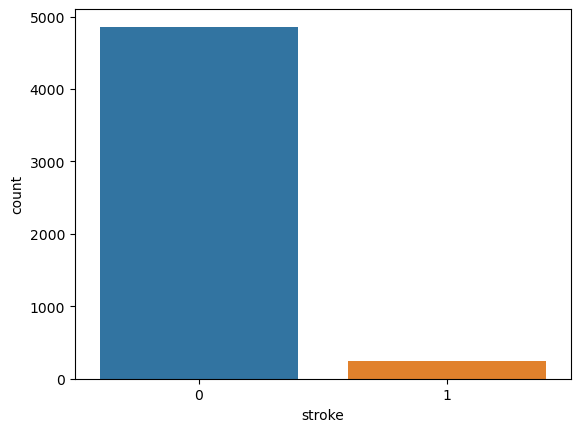

In [86]:
print(df['stroke'].value_counts())
sns.countplot(x='stroke', data=df)

* In this dataset, 249 rows in the stroke column have the value of 1 indicating presence of stroke risk while 4861 rows in the stroke column have the value of 0 indicating no stroke risk.
* It is clear that the dataset is an imbalanced dataset. We will use the SMOTE technique to balance this dataset later.

In [87]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Data Preprocessing

#### Missing Data Analysis

In [88]:
# Inspecting dataset for null values and filled if any are detected.

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 null values in column bmi. Hence, the null values in the column bmi are filled using the data column's mean value in this case.

In [89]:
# Null values to be filled with mean value of the column bmi

df["bmi"].fillna(28,inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [90]:
df.isnull().sum()   # Verify after filling null values of column bmi with mean value of 28.

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Label Encoding

* Label encoding converts the dataset's string literals to integer values that the computer can comprehend.
* The dataset contains five columns of the data type string, and all strings are encoded during label encoding so that the whole dataset is transformed into a collection of numbers.

In [91]:
print(df['Residence_type'].value_counts())

print(df['work_type'].value_counts())

print(df['smoking_status'].value_counts())


Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [92]:
# map columns gender, ever_married, work_type, Residence_type and smoking_status into Nominal Values

df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['work_type'] = df['work_type'].map({'Private': 1, 'Self-employed': 2, 'children': 3, 'Govt_job': 4, 'Never_worked': 5})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 2})
df['smoking_status'] = df['smoking_status'].map({'never smoked': 1, 'Unknown': 2, 'formerly smoked': 3, 'smokes': 4})
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

In [93]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,1,1,228.69,36.6,3,1
1,51676,1,61.0,0,0,1,2,2,202.21,28.0,1,1
2,31112,0,80.0,0,1,1,1,2,105.92,32.5,1,1
3,60182,1,49.0,0,0,1,1,1,171.23,34.4,4,1
4,1665,1,79.0,1,0,1,2,2,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,1,1,83.75,28.0,1,0
5106,44873,1,81.0,0,0,1,2,1,125.20,40.0,1,0
5107,19723,1,35.0,0,0,1,2,2,82.99,30.6,1,0
5108,37544,0,51.0,0,0,1,1,2,166.29,25.6,3,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [95]:
# Dropping unnecessary column

df.drop("id", axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,1,1,228.69,36.6,3,1
1,1,61.0,0,0,1,2,2,202.21,28.0,1,1
2,0,80.0,0,1,1,1,2,105.92,32.5,1,1
3,1,49.0,0,0,1,1,1,171.23,34.4,4,1
4,1,79.0,1,0,1,2,2,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,1,83.75,28.0,1,0
5106,1,81.0,0,0,1,2,1,125.20,40.0,1,0
5107,1,35.0,0,0,1,2,2,82.99,30.6,1,0
5108,0,51.0,0,0,1,1,2,166.29,25.6,3,0


The column id is omitted since its presence has no bearing on model construction.

### Data Visualization

<Axes: xlabel='age', ylabel='avg_glucose_level'>

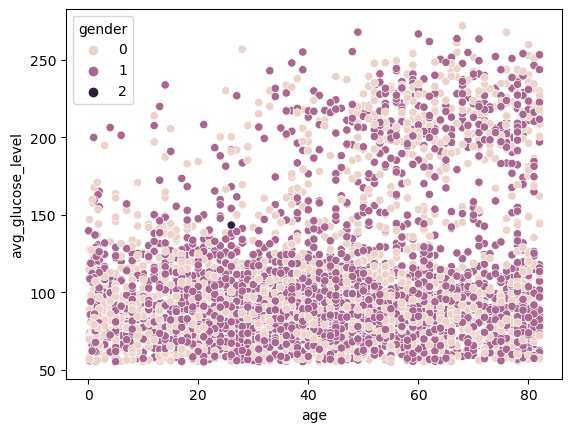

In [96]:
sns.scatterplot(x='age',y='avg_glucose_level', hue='gender', data=df)

There is a higher distribution of glucose level >=200 for age group around 50 years old and above.

<Figure size 600x400 with 0 Axes>

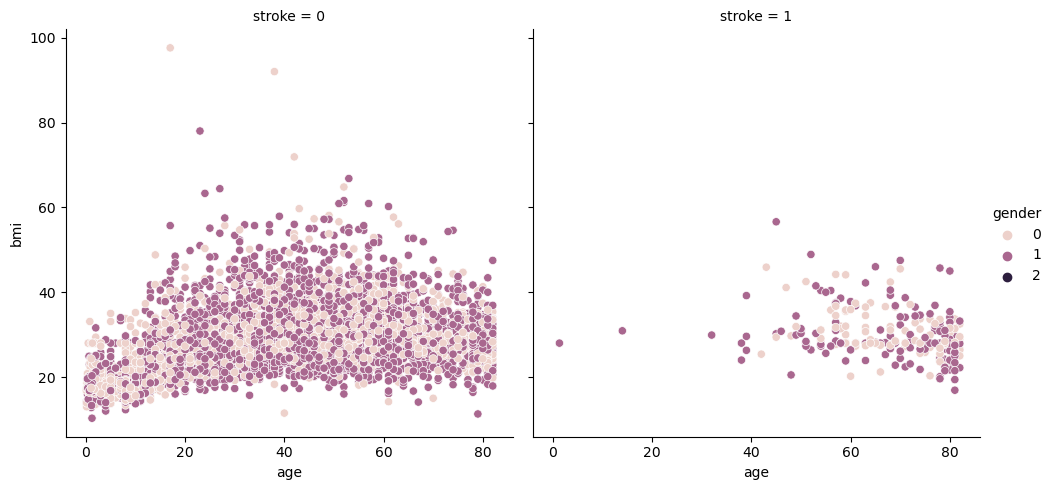

In [97]:
plt.figure(figsize=(6,4))
sns.relplot(x='age',y='bmi', hue='gender', col='stroke', data=df)

* No clear relationship between age and bmi for individuals with stroke risk (value=1).
* Evidence of stroke risk for age group 40 and above with clustering towards older age group (70-80 years old).
* However, there is slight relationship of increasing bmi with increasing age but flattens out after age 60 and above.

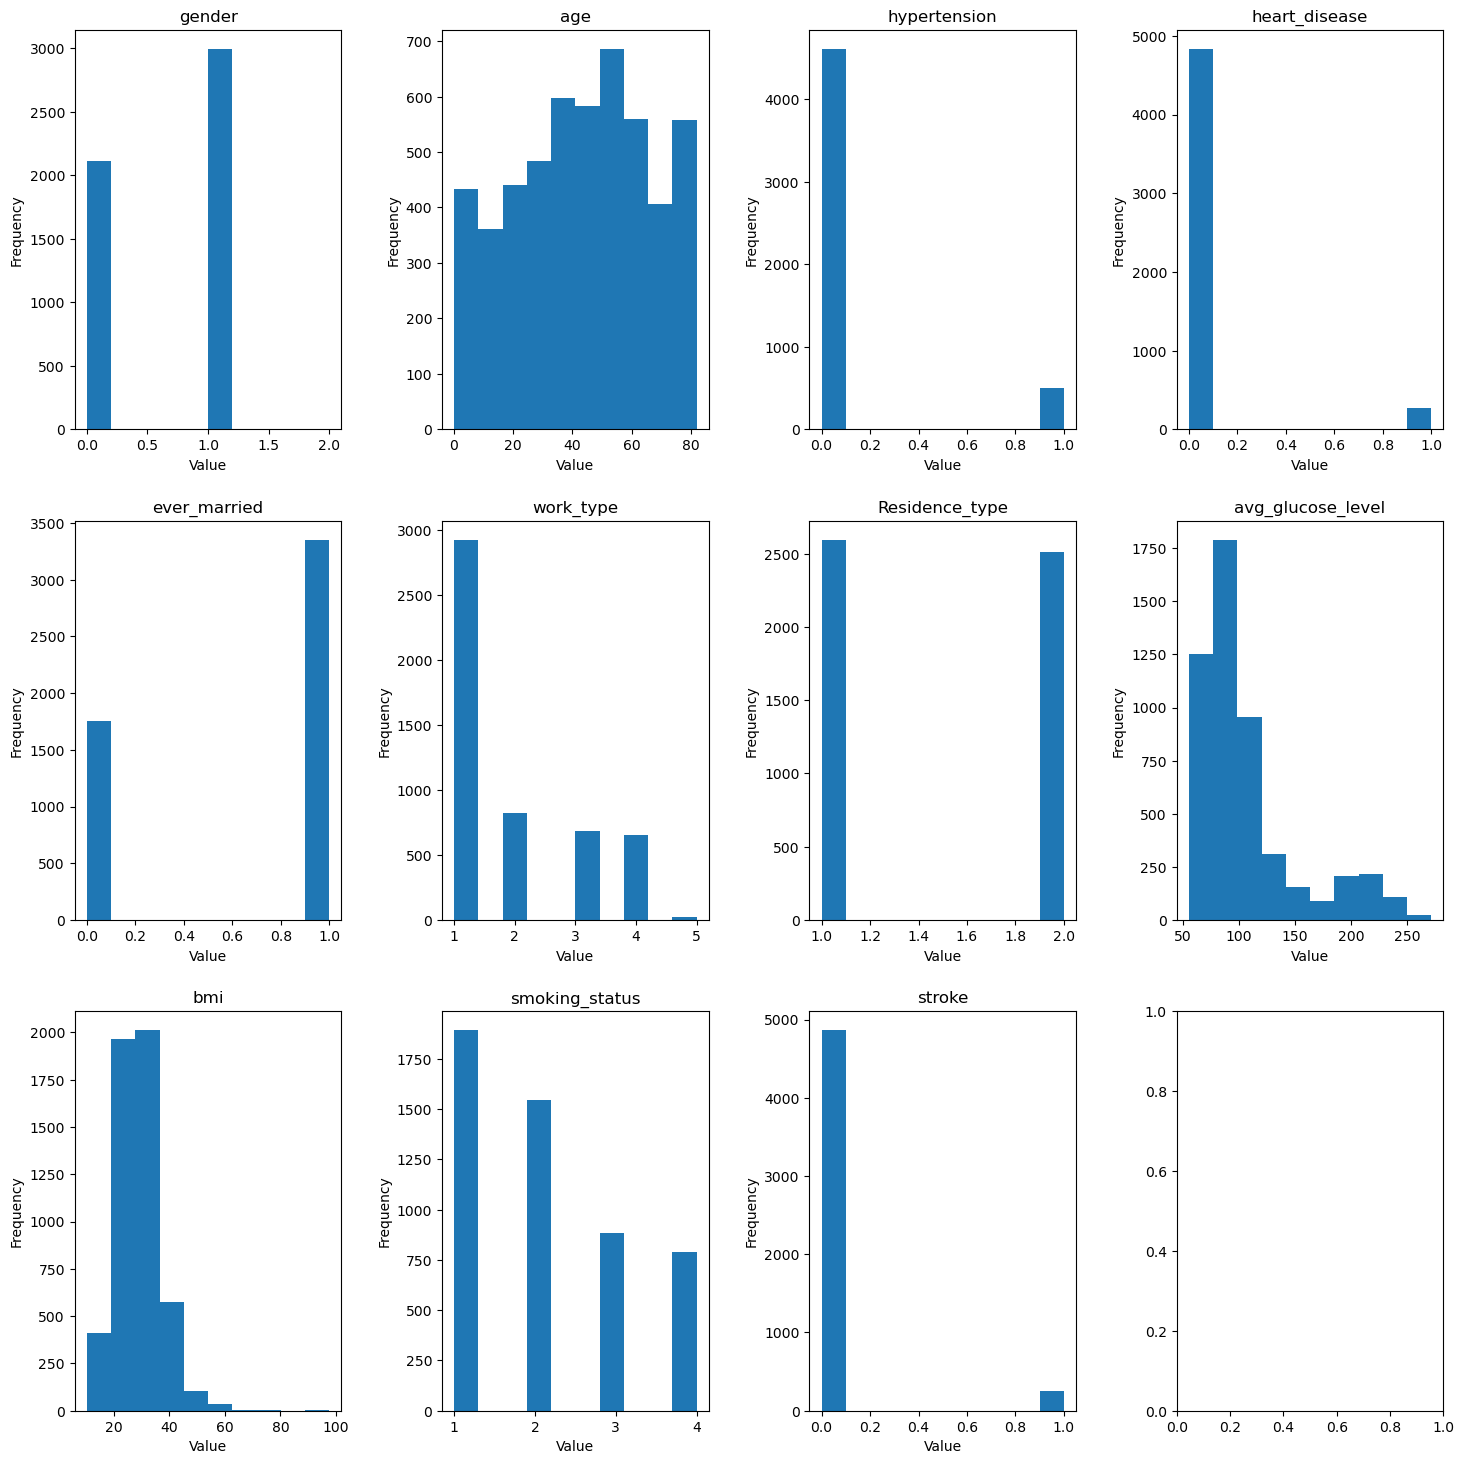

In [98]:
# Get the list of numerical column names
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create a 4 by 3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

# Loop through the numerical columns and generate histograms
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 4)  # Calculate row and column indices
    ax = axes[row, col]  # Get the current subplot
    df[column].plot(kind='hist', ax=ax, title=column)  # Generate histogram
    ax.set_xlabel('Value')  # Set x-axis label
    ax.set_ylabel('Frequency')  # Set y-axis label

# Adjust the spacing between subplots with tight_layout
plt.tight_layout(pad=2)  # Increase the pad value to increase spacing

# Show the plots
plt.show()

* For the gender attribute, 0 means male and 1 means female. There are more female samples than male samples in this dataset.
* Based on the age distribution, the sample's average age is in the 40s, and the upper limit is approximately 60.
* For hypertension, 0 means the individual does not have it, while 1 means the person has it.
* The total number of individuals who are healthy and have no history of heart disease is achieved in this dataset.

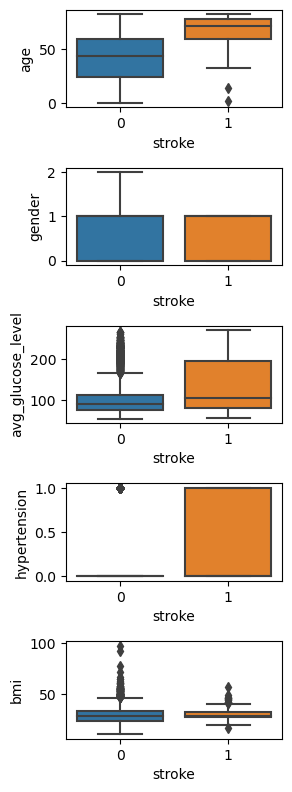

In [99]:
# Create subplots of some key features with target feature to show relationships.

fig, ax = plt.subplots (nrows=5, ncols=1, figsize=(3,8)) # Create a 5x1 grid of subplots
sns.boxplot (x='stroke', y='age', data=df, ax=ax [0]) # Plot stroke vs age on the first subplot
sns.boxplot (x='stroke', y='gender', data=df, ax=ax [1]) # Plot stroke vs gender on the second subplot
sns.boxplot (x='stroke', y='avg_glucose_level', data=df, ax=ax [2]) # Plot stroke vs glucose level on the third subplot
sns.boxplot (x='stroke', y='hypertension', data=df, ax=ax [3]) # Plot stroke vs hypertension on the fourth subplot
sns.boxplot (x='stroke', y='bmi', data=df, ax=ax [4]) # Plot stroke vs bmi on the fifth subplot

# Adjust the spacing between subplots with tight_layout
plt.tight_layout(pad=1)  # Increase the pad value to increase spacing


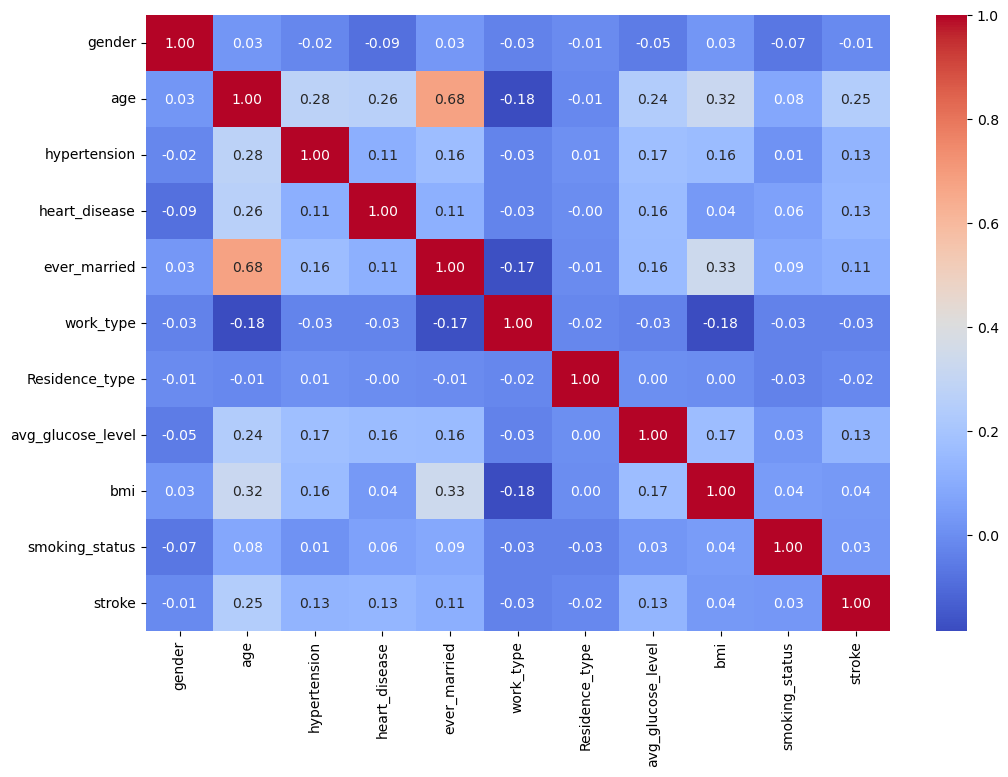

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm', fmt='.2f', annot=True)
plt.show()

In [101]:
# Top 10 features correlation with stroke

corr_matrix = df.corr()['stroke'].drop(index='stroke').sort_values(ascending=False)
print("\nTop 10 correlated columns to stroke is:")
display(corr_matrix.head(10))


Top 10 correlated columns to stroke is:


age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.035751
smoking_status       0.030682
gender              -0.009200
Residence_type      -0.015458
work_type           -0.032098
Name: stroke, dtype: float64

Age, heart disease, glucose level, hypertension, ever_married, and bmi showed positive correlation with stroke, the target feature.

### Data Modeling

* The machine learning algorithms to be explored in this project are :
  - Logistic Regression
  - Random Forest
  - Decision Tree
  - Support Vector Machine
  - k-Nearest Neighbor (KNN)

In [109]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,1,1,228.69,36.6,3,1
1,1,61.0,0,0,1,2,2,202.21,28.0,1,1
2,0,80.0,0,1,1,1,2,105.92,32.5,1,1
3,1,49.0,0,0,1,1,1,171.23,34.4,4,1
4,1,79.0,1,0,1,2,2,174.12,24.0,1,1


In [110]:
# Feature Selection

X = df.drop('stroke', axis=1)
y = df['stroke']

In [111]:
# Verifying the features and target vairables

display(X.head())
display(y.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,1,1,228.69,36.6,3
1,1,61.0,0,0,1,2,2,202.21,28.0,1
2,0,80.0,0,1,1,1,2,105.92,32.5,1
3,1,49.0,0,0,1,1,1,171.23,34.4,4
4,1,79.0,1,0,1,2,2,174.12,24.0,1


0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [117]:
# Train-Test-Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [121]:
# Describes info about train and test set 

print("X_train dataset: ", X_train.shape) 
print("y_train dataset: ", y_train.shape) 
print("X_test dataset: ", X_test.shape) 
print("y_test dataset: ", y_test.shape) 

X_train dataset:  (3832, 10)
y_train dataset:  (3832,)
X_test dataset:  (1278, 10)
y_test dataset:  (1278,)


In [122]:
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train) 
  
prediction = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, prediction)) 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       1.00      0.02      0.03        65

    accuracy                           0.95      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.95      0.95      0.93      1278



The accuracy comes out to be 95% but the recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.
Now, we will apply different imbalanced data handling techniques and see their accuracy and recall results.

### SMOTE & Near Miss Algorithm for imbalanced classification

* Imbalanced Data Distribution, generally happens when observations in one of the class are much higher or lower than the other classes. As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution. 

* Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

* Imbalanced Data Handling Techniques: There are mainly 2 mainly algorithms that are widely used for handling imbalanced class distribution.
    - SMOTE (Synthetic Minority Oversampling Technique)
    - Near Miss Algorithm

In [123]:
# Using SMOTE algorithm

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library  
sm = SMOTE(random_state=0) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 184
Before OverSampling, counts of label '0': 3648 

After OverSampling, the shape of train_X: (7296, 10)
After OverSampling, the shape of train_y: (7296,) 

After OverSampling, counts of label '1': 3648
After OverSampling, counts of label '0': 3648


SMOTE Algorithm has oversampled the minority instances and made it equal to majority class. Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.

#### Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1213
           1       0.12      0.48      0.19        65

    accuracy                           0.80      1278
   macro avg       0.54      0.64      0.54      1278
weighted avg       0.92      0.80      0.85      1278



Text(50.722222222222214, 0.5, 'Actual Values')

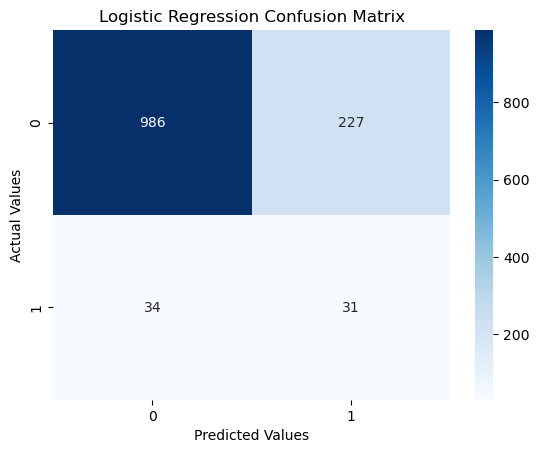

In [124]:
# Logistic Regression

lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res) 
lr1prediction = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, lr1prediction)) 

lr1Conf = metrics.confusion_matrix(y_test,lr1prediction)
sns.heatmap(lr1Conf, cmap='Blues', annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

We have reduced the accuracy to 80% as compared to previous model but the recall value of minority class has also improved to 48 %. Let's check another algorithm with NearMiss.

In [125]:
# Using NearMiss Algorithm

print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

Before Undersampling, counts of label '1': 184
Before Undersampling, counts of label '0': 3648 

After Undersampling, the shape of train_X: (368, 10)
After Undersampling, the shape of train_y: (368,) 

After Undersampling, counts of label '1': 184
After Undersampling, counts of label '0': 184


The NearMiss Algorithm has undersampled the majority instances and made it equal to majority class. Here, the majority class has been reduced to the total number of minority class, so that both classes will have equal number of records.

In [126]:
# Train the model on train set using Logistic regression.

lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss) 
prediction = lr2.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, prediction)) 

              precision    recall  f1-score   support

           0       0.91      0.14      0.24      1213
           1       0.04      0.74      0.08        65

    accuracy                           0.17      1278
   macro avg       0.47      0.44      0.16      1278
weighted avg       0.86      0.17      0.23      1278



* The recall value of minority class is 74 % better than previous model. But due to undersampling of majority class, its recall has decreased to 14 %. Accuracy is also worse and hence not a good model. 
* So in this case, SMOTE is giving a great accuracy and recall.

#### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1213
           1       0.12      0.14      0.13        65

    accuracy                           0.90      1278
   macro avg       0.53      0.54      0.54      1278
weighted avg       0.91      0.90      0.91      1278



Text(50.722222222222214, 0.5, 'Actual Values')

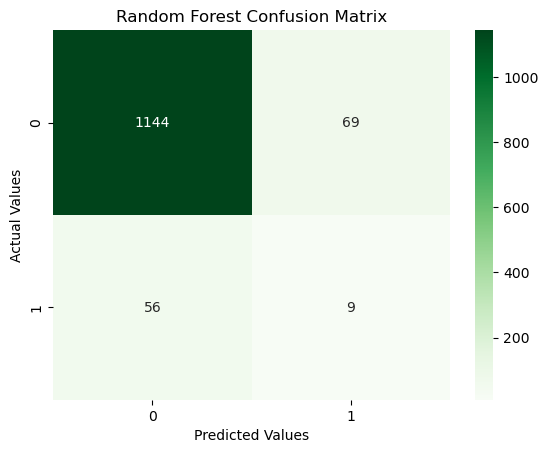

In [132]:
# Train the model on train set using Random Forest Classifier.

rf = RandomForestClassifier(n_estimators = 200)
  
# Train the model on train set 
rf.fit(X_train_res, y_train_res.ravel())  
  
rfprediction = rf.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, rfprediction)) 

rfConf = metrics.confusion_matrix(y_test,rfprediction)
sns.heatmap(rfConf, cmap='Greens', annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

The accuracy of Random Forest Classifier is 90% but the recall of the minority class in very less (14%). It proves that the model is more biased towards majority class. 

#### Decision Tree

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1213
           1       0.12      0.20      0.15        65

    accuracy                           0.89      1278
   macro avg       0.54      0.56      0.54      1278
weighted avg       0.91      0.89      0.90      1278



Text(50.722222222222214, 0.5, 'Actual Values')

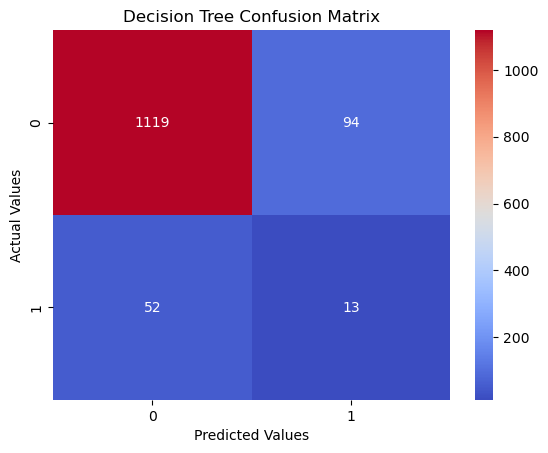

In [133]:
# Train the model on train set using Decision Tree Classifier.

tree = DecisionTreeClassifier()
  
# Train the model on train set 
tree.fit(X_train_res, y_train_res.ravel())  
  
treeprediction = tree.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, treeprediction)) 

treeConf = metrics.confusion_matrix(y_test,treeprediction)
sns.heatmap(treeConf, cmap='coolwarm', annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

The accuracy of Decision Tree Classifier is 87% but the recall of the minority class in very less (12%). It proves that the model is more biased towards majority class. So, it proves that this is not the best model.

#### Support Vector Machine

              precision    recall  f1-score   support

           0       0.98      0.71      0.82      1213
           1       0.12      0.75      0.21        65

    accuracy                           0.71      1278
   macro avg       0.55      0.73      0.51      1278
weighted avg       0.94      0.71      0.79      1278



Text(50.722222222222214, 0.5, 'Actual Values')

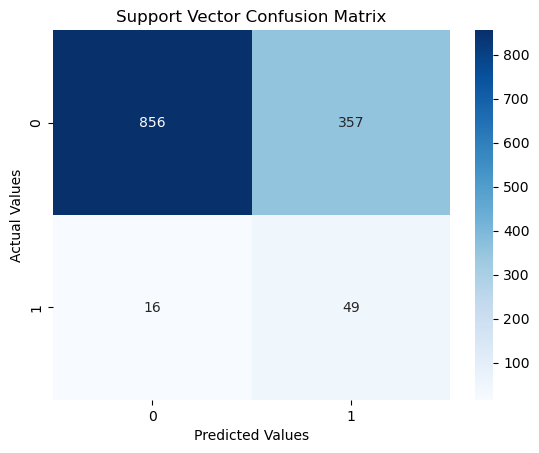

In [134]:
# Train the model on train set using Support Vector Classifier.

svc = SVC()
  
# Train the model on train set 
svc.fit(X_train_res, y_train_res.ravel())  
  
svcprediction = svc.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, svcprediction)) 

svcConf = metrics.confusion_matrix(y_test,svcprediction)
sns.heatmap(svcConf, cmap='Blues', annot=True, fmt='d')
plt.title('Support Vector Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')



The accuracy of Support Vector Classifier is 72% but the recall of the minority class equal to that of majority class. But due to poorer accuracy, this model is not the best.

#### k-Nearest Neighbor (kNN)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1213
           1       0.11      0.42      0.17        65

    accuracy                           0.79      1278
   macro avg       0.53      0.61      0.52      1278
weighted avg       0.92      0.79      0.84      1278



Text(50.722222222222214, 0.5, 'Actual Values')

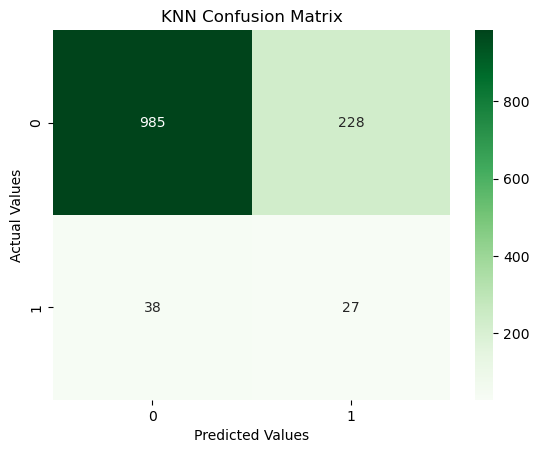

In [135]:
# Train the model on train set using KNN Classifier.

knn = KNeighborsClassifier(n_neighbors=5)
  
# Train the model on train set 
knn.fit(X_train_res, y_train_res)  
  
knnprediction = knn.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, knnprediction)) 

knnConf = metrics.confusion_matrix(y_test,knnprediction)
sns.heatmap(knnConf, cmap='Greens', annot=True, fmt='d')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')


The accuracy of k-Nearest Neighbor Classifier is 80% and the recall of the minority class has improved to 42% compared to other models. 

### Model Performance Evaluation

In [136]:
# Using metrics module for accuracy calculation

lrAccuracy = metrics.accuracy_score(lr1prediction, y_test)
print("The accuracy of logistic regression model is: {:.1f}%".format(lrAccuracy*100))

rfAccuracy = metrics.accuracy_score(rfprediction, y_test)
print("The accuracy of Random Forest model is: {:.1f}%".format(rfAccuracy*100))

treeAccuracy = metrics.accuracy_score(treeprediction, y_test)
print("The accuracy of Decision Tree model is: {:.1f}%".format(treeAccuracy*100))

svcAccuracy = metrics.accuracy_score(svcprediction, y_test)
print("The accuracy of Support Vector Machine model is: {:.1f}%".format(svcAccuracy*100))

knnAccuracy = metrics.accuracy_score(knnprediction, y_test)
print("The accuracy of KNN model is: {:.1f}%".format(knnAccuracy*100))

The accuracy of logistic regression model is: 79.6%
The accuracy of Random Forest model is: 90.2%
The accuracy of Decision Tree model is: 88.6%
The accuracy of Support Vector Machine model is: 70.8%
The accuracy of KNN model is: 79.2%


### Conclusion


Random Forest model achieved the highest accuacy of 90% as this model outperforms the other methods tested with an accuracy of 90%.
Therefore, the development of machine learning model can help in early detection of stroke and saving lives.